In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score

In [164]:
df = pd.read_csv('conversion_data.csv')

df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [166]:
df.describe(include= 'all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


In [167]:
df['total_views'] = df['product_views_Mon'] + df['product_views_Tue'] + df['product_views_Wed'] + df['product_views_Thu'] + df['product_views_Fri']
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,total_views
0,0,1,North America,youtube,M,4,5,2,1,2,...,23,46,57,4,5,5,4,6,1,14
1,1,2,South America,organic,F,2,5,0,1,5,...,39,24,51,5,6,7,6,2,0,13
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,22,34,31,1,3,3,2,3,1,9
3,3,4,North America,facebook,M,1,0,0,5,0,...,43,22,39,3,4,7,7,1,0,6
4,4,5,Asia,instagram,F,1,5,2,2,3,...,30,47,57,6,6,5,2,4,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,51,44,29,5,1,5,7,7,0,9
1996,1996,1997,South America,google,M,1,2,0,4,1,...,33,59,38,1,6,6,7,6,0,8
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,30,48,38,2,1,7,6,4,0,13
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,51,41,56,6,4,2,2,3,1,16


In [168]:
df.drop(columns=['Unnamed: 0'], axis= 1, inplace= True)
df.head()

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,total_views
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,23,46,57,4,5,5,4,6,1,14
1,2,South America,organic,F,2,5,0,1,5,1.31,...,39,24,51,5,6,7,6,2,0,13
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,22,34,31,1,3,3,2,3,1,9
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,43,22,39,3,4,7,7,1,0,6
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,30,47,57,6,6,5,2,4,1,13


<Axes: xlabel='converted_Fri', ylabel='total_views'>

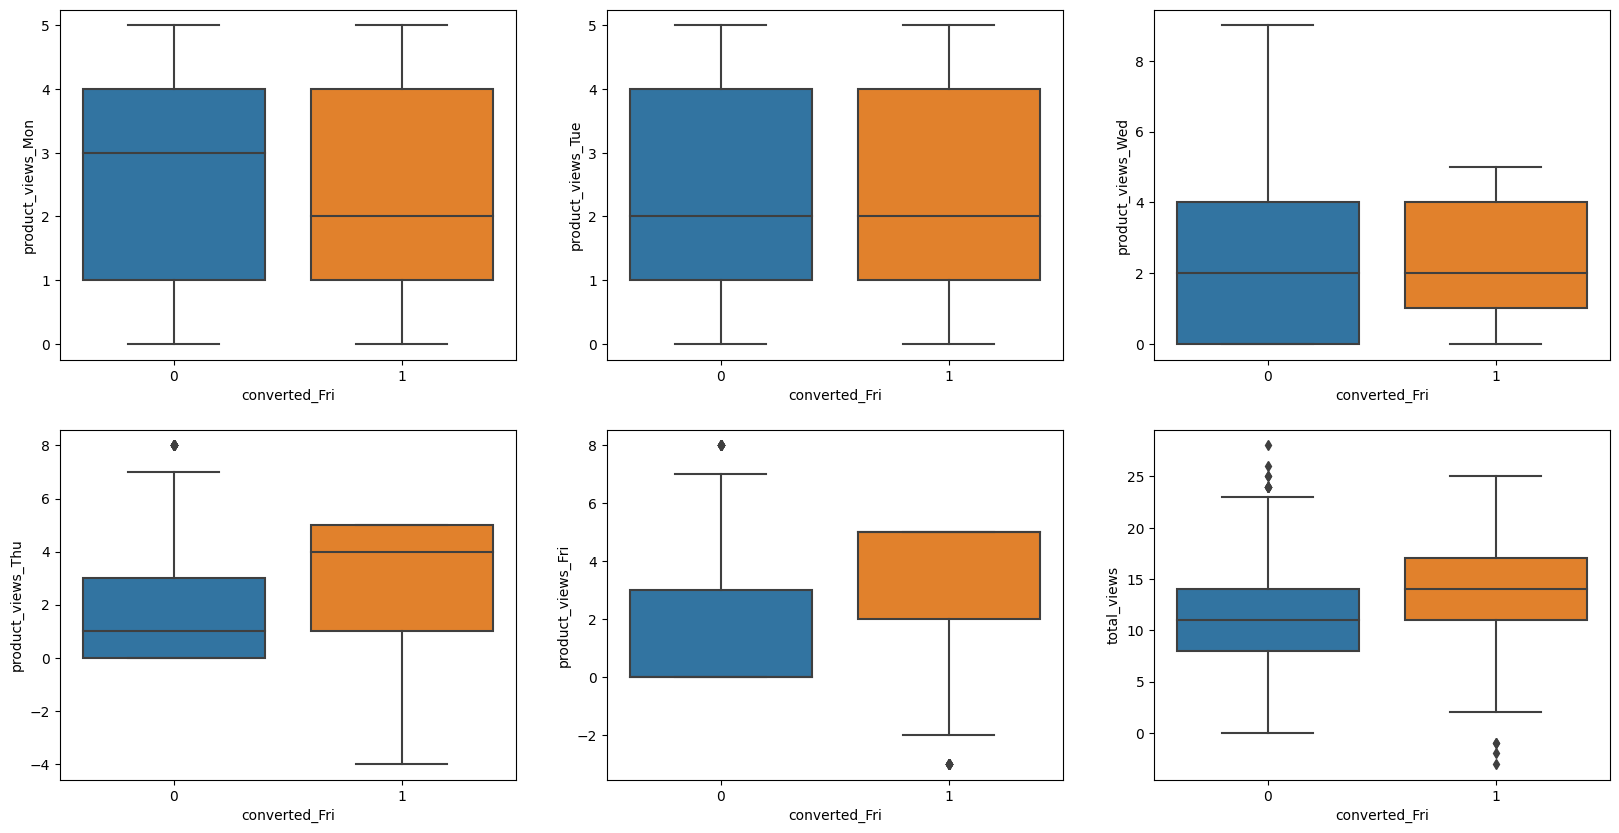

In [169]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='product_views_Mon', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='product_views_Tue', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='product_views_Wed', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='product_views_Thu', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='product_views_Fri', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='total_views', ax=ax6, data=df)



In [170]:
df['total_avg_rating'] = (df['avg_rating_Mon']+df['avg_rating_Tue']+df['avg_rating_Wed']+df['avg_rating_Thu']+df['avg_rating_Fri'])/5
df

,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,...,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri,total_views,total_avg_rating
0,1,North America,youtube,M,4,5,2,1,2,3.90,...,46,57,4,5,5,4,6,1,14,3.134
1,2,South America,organic,F,2,5,0,1,5,1.31,...,24,51,5,6,7,6,2,0,13,2.068
2,3,Australia,instagram,M,3,4,0,-3,5,3.26,...,34,31,1,3,3,2,3,1,9,3.666
3,4,North America,facebook,M,1,0,0,5,0,2.66,...,22,39,3,4,7,7,1,0,6,3.300
4,5,Asia,instagram,F,1,5,2,2,3,2.76,...,47,57,6,6,5,2,4,1,13,2.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Europe,organic,F,3,0,0,4,2,4.80,...,44,29,5,1,5,7,7,0,9,3.008
1996,1997,South America,google,M,1,2,0,4,1,1.34,...,59,38,1,6,6,7,6,0,8,1.858
1997,1998,Asia,facebook,M,2,3,0,0,8,2.56,...,48,38,2,1,7,6,4,0,13,3.280
1998,1999,South America,youtube,F,2,2,2,5,5,4.49,...,41,56,6,4,2,2,3,1,16,3.662


Products viewed closer to the conversion date i.e. wed, thr, fri are more important than mon and tues. The total views is a decent summation of the views and shows importance

<Axes: xlabel='converted_Fri', ylabel='total_avg_rating'>

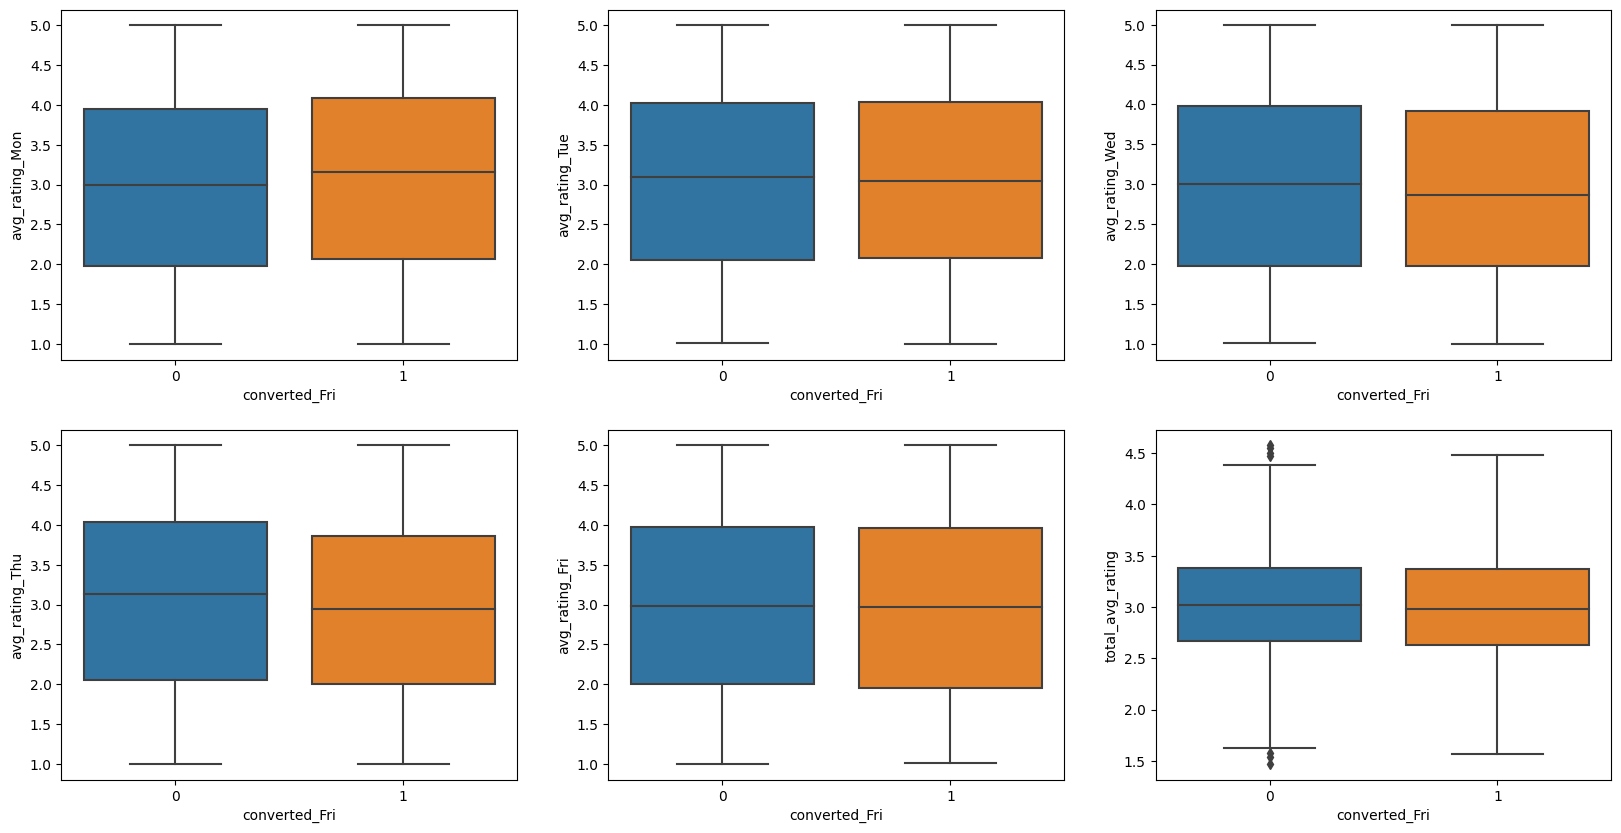

In [171]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='avg_rating_Mon', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='avg_rating_Tue', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='avg_rating_Wed', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='avg_rating_Thu', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='avg_rating_Fri', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='total_avg_rating', ax=ax6, data=df)

Average rating for the 5 days is not important

In [172]:
df['total_avg_price'] = (df['avg_price_Mon']+df['avg_price_Tue']+df['avg_price_Wed']+df['avg_price_Thu']+df['avg_price_Fri'])/5


<Axes: xlabel='converted_Fri', ylabel='total_avg_price'>

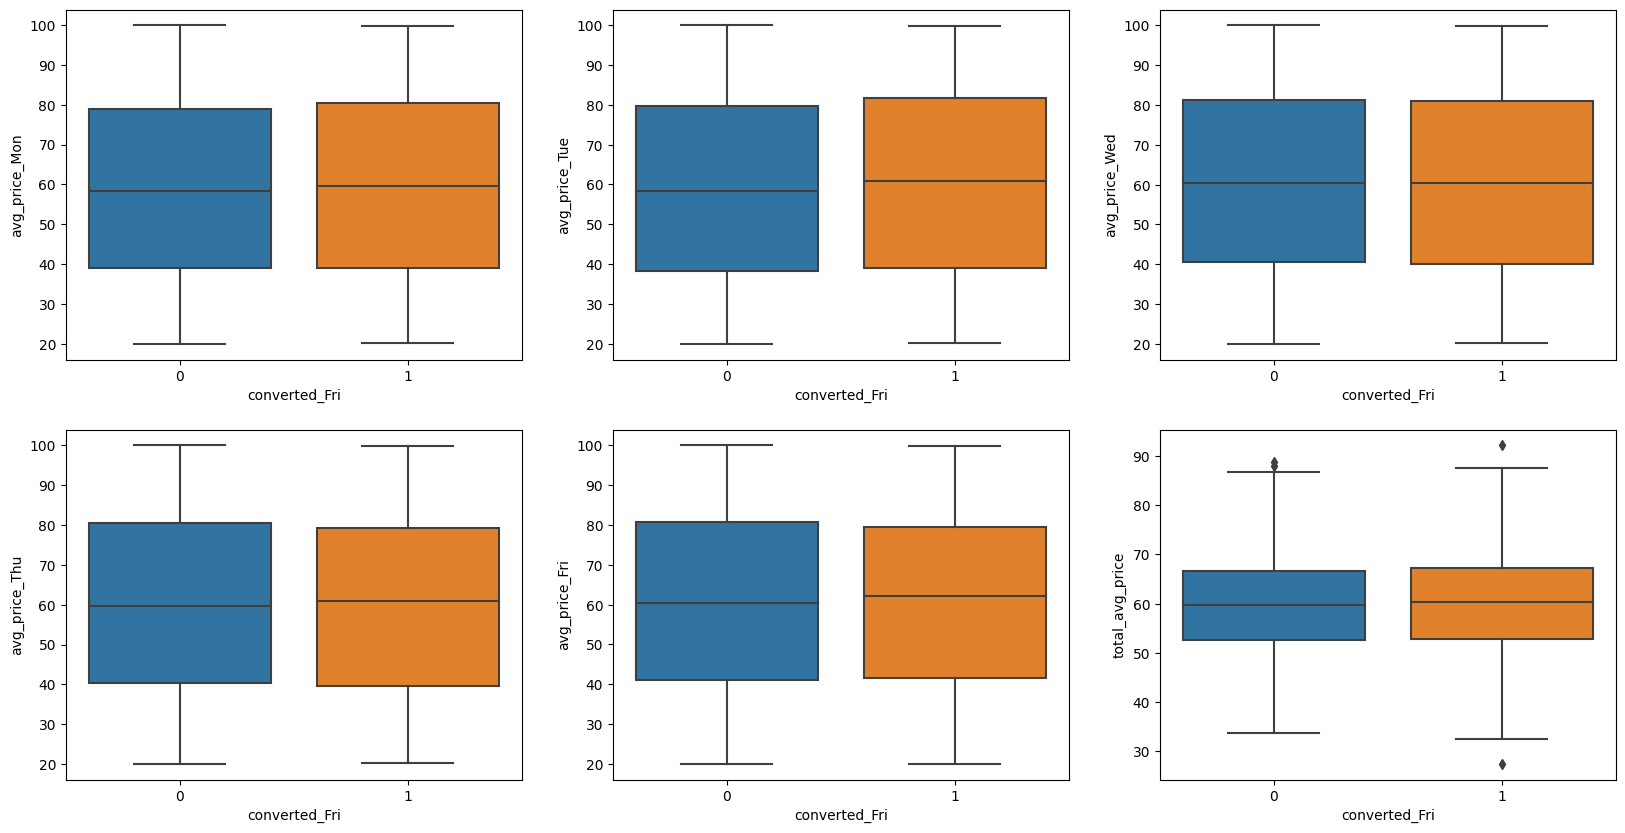

In [173]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='avg_price_Mon', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='avg_price_Tue', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='avg_price_Wed', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='avg_price_Thu', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='avg_price_Fri', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='total_avg_price', ax=ax6, data=df)

Average price of the item also is not very important in the model

In [174]:
df['total_time_on_site'] = df['time_on_site_Mon']+df['time_on_site_Tue']+df['time_on_site_Wed']+df['time_on_site_Thu']+df['time_on_site_Fri']


<Axes: xlabel='converted_Fri', ylabel='total_time_on_site'>

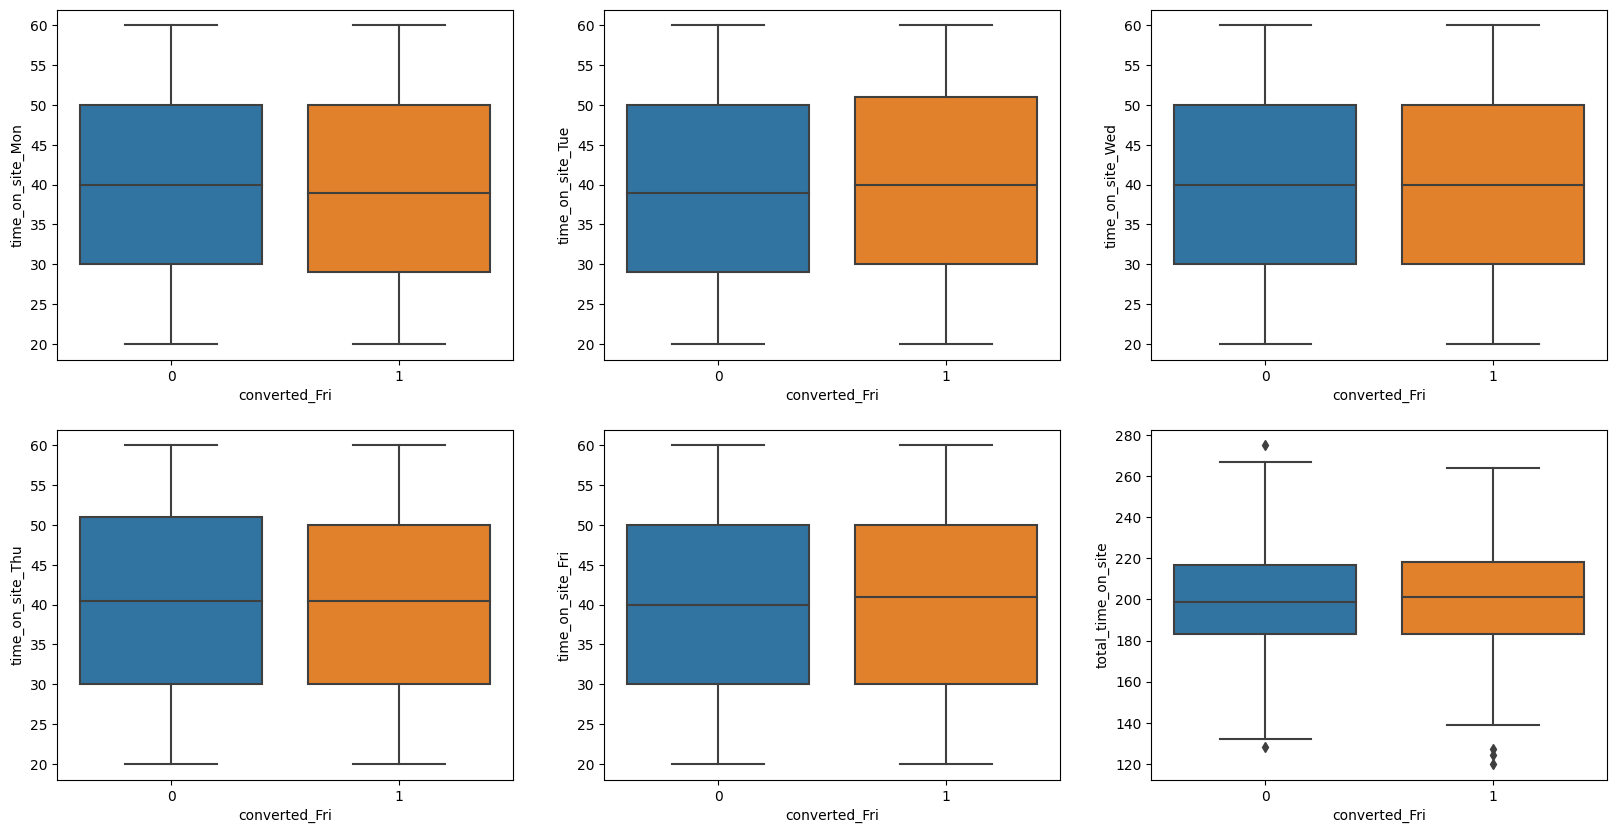

In [175]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='time_on_site_Mon', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='time_on_site_Tue', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='time_on_site_Wed', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='time_on_site_Thu', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='time_on_site_Fri', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='total_time_on_site', ax=ax6, data=df)

Average time on site is also not important in any of the days

In [176]:
df['total_pages_visited'] = df['pages_visited_Mon']+df['pages_visited_Tue']+df['pages_visited_Wed']+df['pages_visited_Thu']+df['pages_visited_Fri']


<Axes: xlabel='converted_Fri', ylabel='total_pages_visited'>

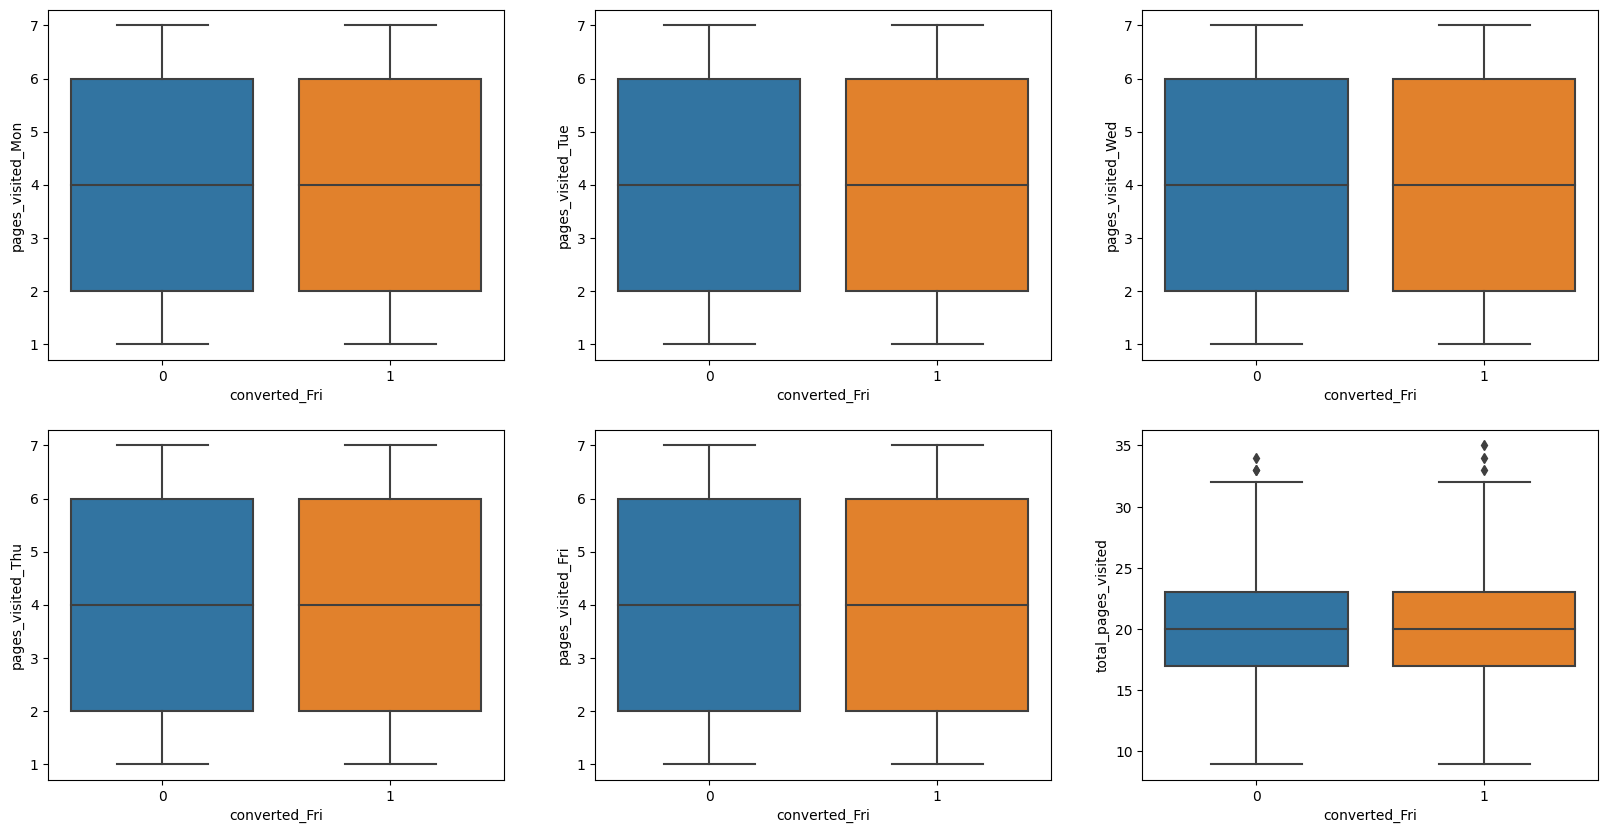

In [177]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='converted_Fri', y='pages_visited_Mon', ax=ax1, data=df)
sns.boxplot(x='converted_Fri', y='pages_visited_Tue', ax=ax2, data=df)
sns.boxplot(x='converted_Fri', y='pages_visited_Wed', ax=ax3, data=df)
sns.boxplot(x='converted_Fri', y='pages_visited_Thu', ax=ax4, data=df)
sns.boxplot(x='converted_Fri', y='pages_visited_Fri', ax=ax5, data=df)
sns.boxplot(x='converted_Fri', y='total_pages_visited', ax=ax6, data=df)

individually pages vistied on each days is also not important

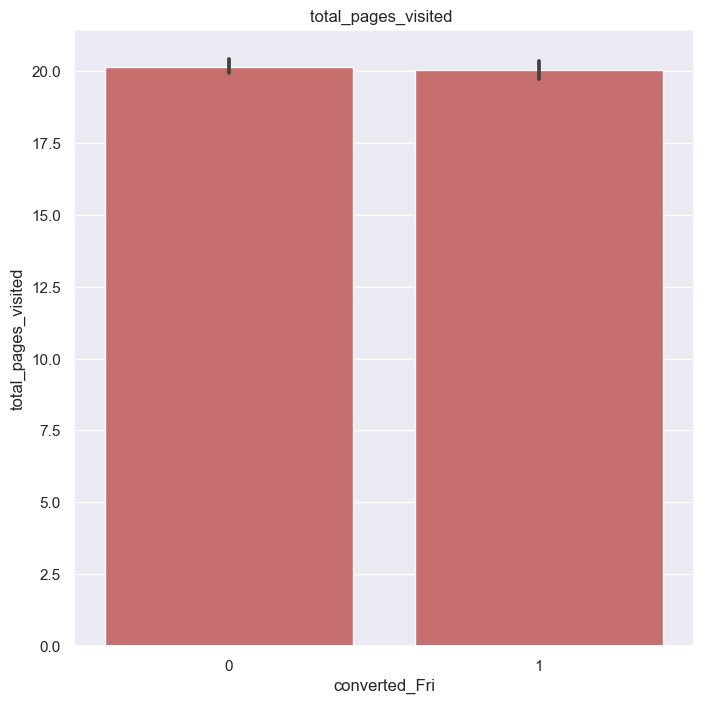

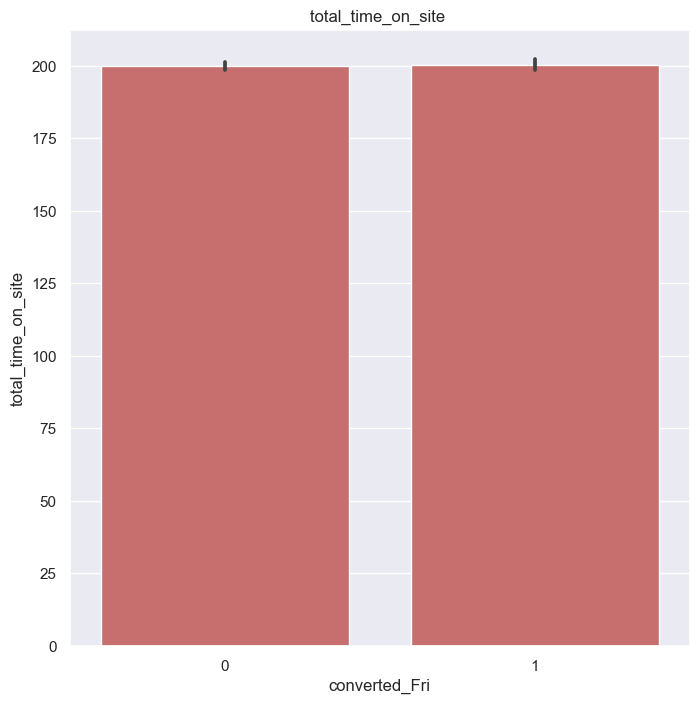

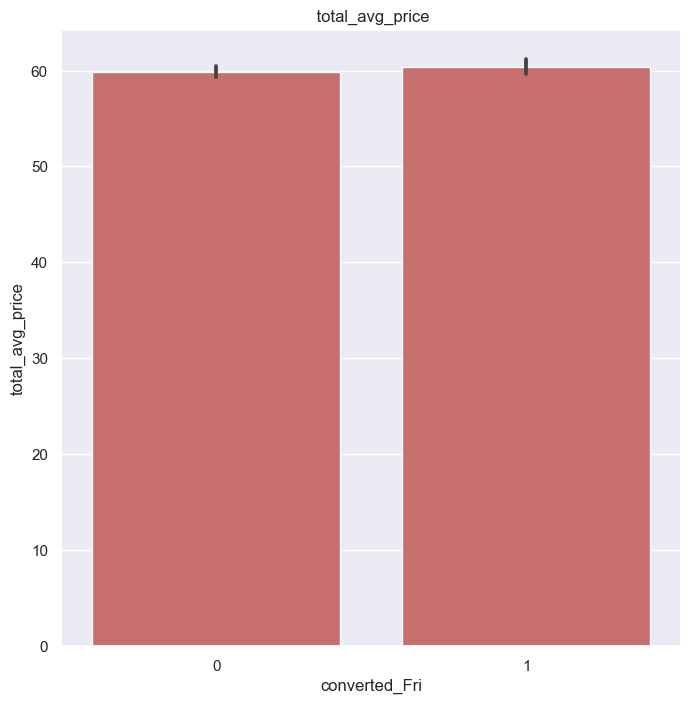

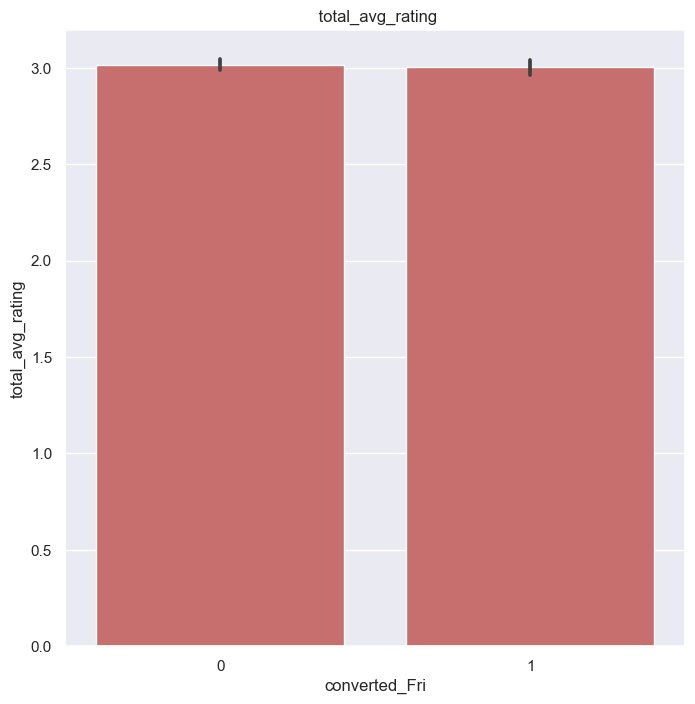

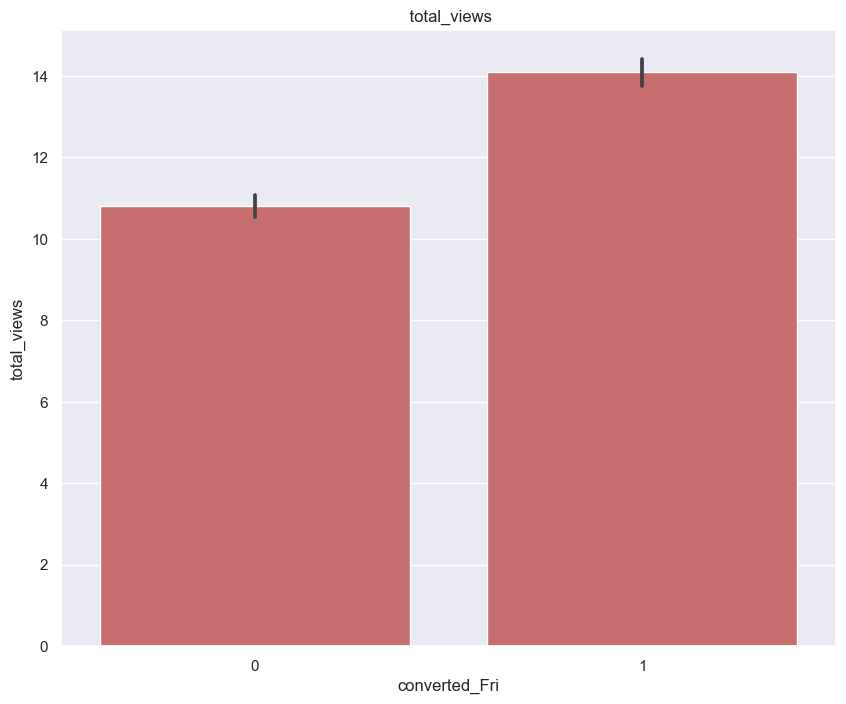

In [208]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes("muted")
sns.barplot(x="converted_Fri", y="total_pages_visited", data= df, color="r")
plt.title("total_pages_visited ")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes("muted")
sns.barplot(x="converted_Fri", y="total_time_on_site", data= df, color="r")
plt.title("total_time_on_site ")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes("muted")
sns.barplot(x="converted_Fri", y="total_avg_price", data= df, color="r")
plt.title(" total_avg_price")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8))
sns.set_color_codes("muted")
sns.barplot(x="converted_Fri", y="total_avg_rating", data= df, color="r")
plt.title(" total_avg_rating")
plt.show()


sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="converted_Fri", y="total_views", data= df, color="r")
plt.title(" total_views")
plt.show()

NOW LOOKING AT CATEGORICAL VARIABLES

In [178]:
df_location = df.groupby(['converted_Fri','visitor_location'])[['gender']].count().unstack()
df_location


gender                                             
visitor_location   Asia Australia Europe North America South America
converted_Fri                                                       
0                   231       268    235           267           255
1                   138       135    148           145           178

In [212]:
df_mchannel = df.groupby(['converted_Fri','marketing_channel'])[['gender']].count().unstack()
df_mchannel

gender                                 
marketing_channel facebook google instagram organic youtube
converted_Fri                                              
0                      238    234       257     311     216
1                      156    165       174      96     153

In [180]:
df_gender = df.groupby(['converted_Fri','gender'])[['marketing_channel']].count().unstack()
df_gender

marketing_channel     
gender                        F    M
converted_Fri                       
0                           602  654
1                           491  253

Gender and Marketing Channel are important. Visitor location seems less important

Initial hypothesis is that gender, marketing channel and number product views on Wednesday, Thursday and Friday are important variables

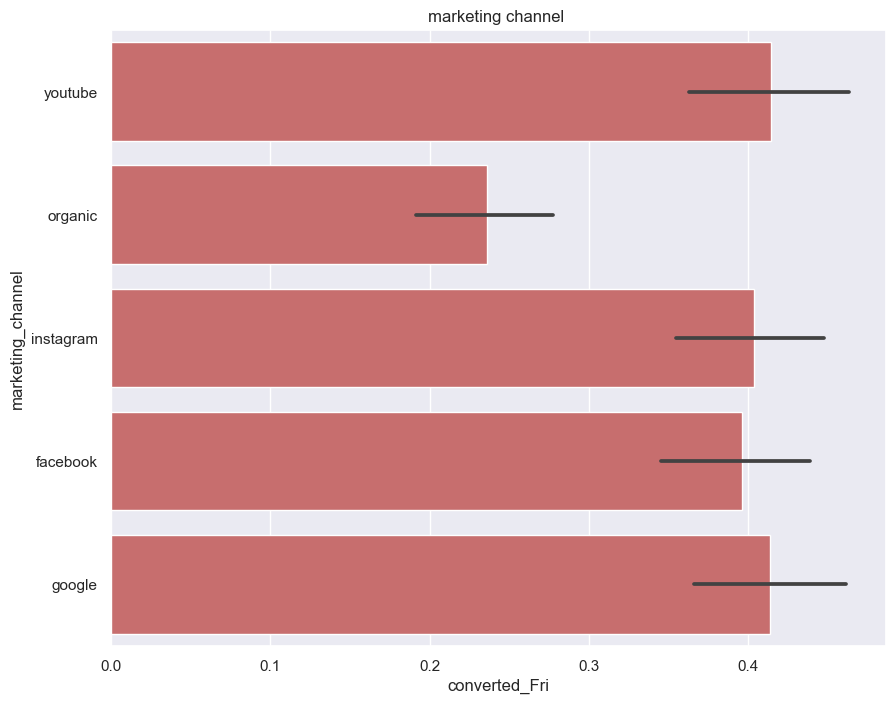

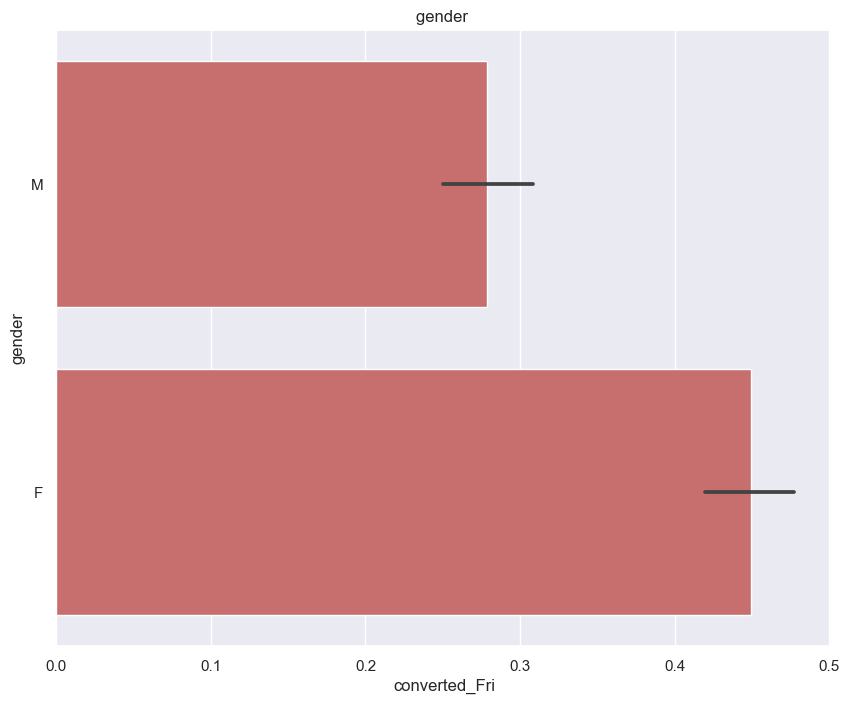

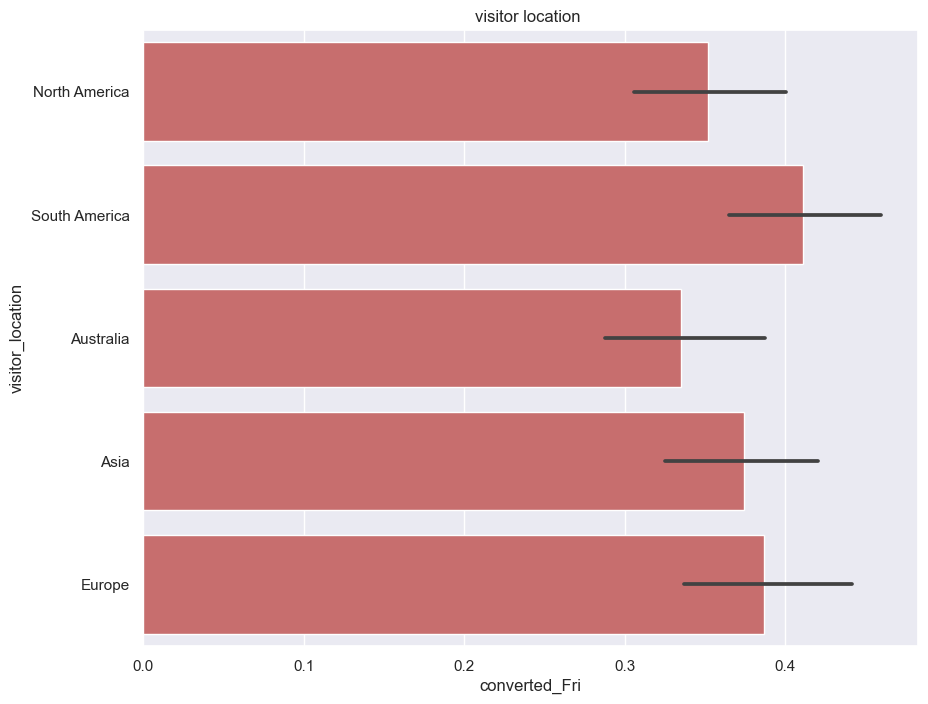

In [205]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="converted_Fri", y="marketing_channel", data= df, color="r")
plt.title("marketing channel ")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="converted_Fri", y="gender", data= df, color="r")
plt.title("gender ")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="converted_Fri", y="visitor_location", data= df, color="r")
plt.title("visitor location ")
plt.show()

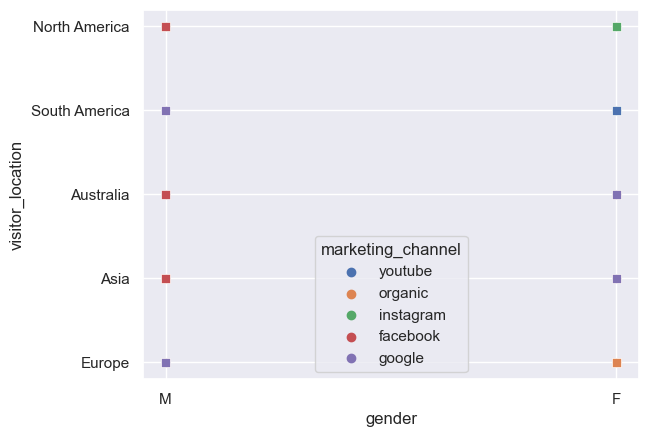

In [220]:
sns.scatterplot(x='gender',
                y='visitor_location',
                data=df,
                hue='marketing_channel',
                marker='s')
plt.show()


for females in south afria and europe the business needs to target youtube and europian females are showing organic shopping. Byv targetting europian female audience through google or youtube we can increase the number of conversions.

In [181]:
df2 = df[['visitor_id','visitor_location','marketing_channel', 'gender','total_views','total_avg_rating','total_avg_price','total_time_on_site','total_pages_visited','converted_Fri']]

In [182]:
df2.describe(include='all')

,visitor_id,visitor_location,marketing_channel,gender,total_views,total_avg_rating,total_avg_price,total_time_on_site,total_pages_visited,converted_Fri
count,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,NaN
mean,1000.500000,NaN,NaN,NaN,12.033500,3.010703,60.090538,200.161000,20.120000,0.372000
std,577.494589,NaN,NaN,NaN,4.847177,0.523766,10.238399,25.499435,4.500303,0.483459
min,1.000000,NaN,NaN,NaN,-3.000000,1.472000,27.520000,120.000000,9.000000,0.000000
25%,500.750000,NaN,NaN,NaN,9.000000,2.656000,52.723500,183.000000,17.000000,0.000000
50%,1000.500000,NaN,NaN,NaN,12.000000,3.006000,59.919000,200.000000,20.000000,0.000000
75%,1500.250000,NaN,NaN,NaN,15.000000,3.376000,66.823000,218.000000,23.000000,1.000000


In [183]:
cat_columns = ['gender','visitor_location', 'marketing_channel']
num_columns = ['total_views','total_avg_rating','total_avg_price','total_time_on_site','total_pages_visited']
target = ['converted_Fri']

In [184]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_columns), ('cat', cat_transformer, cat_columns)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['total_views', 'total_avg_rating',
                                  'total_avg_price', 'total_time_on_site',
                                  'total_pages_visited']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'visitor_location',
                                  'marketing_channel'])])

In [185]:
X = df2[num_columns + cat_columns]
y = df2[target]

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 123)

In [187]:
log = LogisticRegression()
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log)
])
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression ACCURACY: {log_accuracy}")
print(f1_score(y_pred,y_test))

Logistic Regression ACCURACY: 0.6925
0.5287356321839081


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [188]:
rf = RandomForestClassifier()
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)

print(f"RANDOM FOREST CLASSIFIER ACCURACY: {rf_accuracy}")
print(f1_score(y_pred,y_test))

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


RANDOM FOREST CLASSIFIER ACCURACY: 0.6775
0.49011857707509876


In [189]:
knn_classifier = KNeighborsClassifier()
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_classifier)
])
knn_pipeline.fit(X_train, y_train)
y_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy}")
print(f1_score(y_pred,y_test))

Accuracy: 0.635
0.44696969696969696


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [190]:
nb = GaussianNB()
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nb)
])
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {nb_accuracy}")
print(f1_score(y_pred,y_test))

Accuracy: 0.655
0.5106382978723404


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [191]:
svc = SVC(kernel='linear')
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])
svc_pipeline.fit(X_train, y_train)
y_pred = svc_pipeline.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {svc_accuracy}")
print(f1_score(y_pred,y_test))

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.67
0.467741935483871


Logistic Regression and Naive Bayes are the better options based on ACCURACY and F1_SCORE

In [192]:
X_transformed = preprocessor.fit_transform(X_test)

In [193]:
log_pred_prob = log.predict_proba(X_transformed)

In [194]:
fpr, tpr, tresholds = roc_curve(y_test,log_pred_prob[:,1])

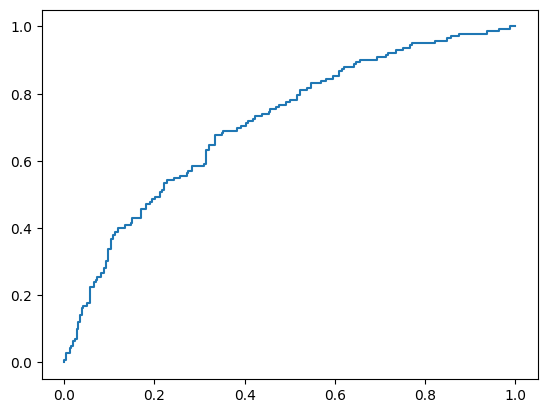

In [195]:
plt.plot(fpr,tpr)

In [196]:
gmeans = np.sqrt(tpr*(1-fpr))

In [197]:
print(tresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])

0.382437655122876
0.6713450866373513


In [198]:
y_pred_new = []
for i in log_pred_prob[:,1]:
  if i < 0.382437655122876:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

In [199]:
print("accuracy")
log_accuracy = accuracy_score(y_test, y_pred_new)
print(log_accuracy)

print("f1score:")
f1_score(y_pred_new,y_test)

accuracy
0.67
f1score:


0.5925925925925927

In [200]:
fpr, tpr, tresholds = roc_curve(y_test,y_pred_new)

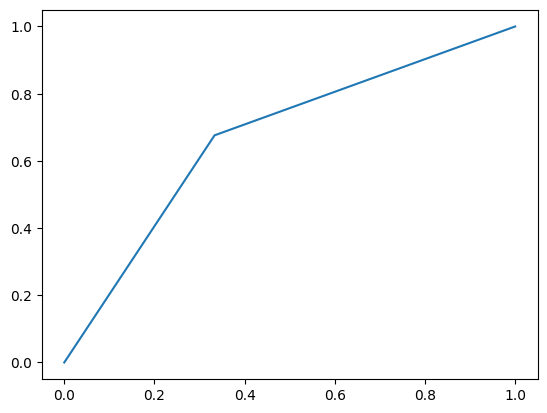

In [201]:
plt.plot(fpr,tpr)

now lets try to improving NB by scoring for f1

In [202]:
gnb = GaussianNB()
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid_search = GridSearchCV(gnb, param_grid=params_nb, cv = 5, scoring='f1', return_train_score= True)
x_transformed= preprocessor.fit_transform(X_train)

nb_grid_search.fit(x_transformed, y_train)


print('best_nb: ', nb_grid_search.best_estimator_)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWar

best_nb:  GaussianNB(var_smoothing=0.0001873817422860383)


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [203]:
# Assuming you have already performed the grid search and obtained the best estimator
nb_grid_best = nb_grid_search.best_estimator_

# Transform the test data using the preprocessor (assuming preprocessor was fit on training data)
x_test_transformed = preprocessor.transform(X_test)

# Make predictions on the transformed test data
y_pred = nb_grid_best.predict(x_test_transformed)

# Calculate the accuracy score by comparing the predicted labels (y_pred) with the true labels (y_test)
nb_grid_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model with the best estimator found from the grid search
print(f"NB W/ GRID SEARCH Accuracy: {nb_grid_accuracy}")

# Print the classification report which includes precision, recall, F1-score, and support for each class
print("f1 score:")
print(f1_score(y_test, y_pred))


NB W/ GRID SEARCH Accuracy: 0.655
f1 score:
0.5106382978723404


LOGISTIC REGRESSION MODEL is the better model as it provides a higher f1 score of 0.59 compared to the Naive Bayes model which only gets a f1score of 0.52.
logistic regression also has higher accuracy which is 0.67 for logistic and 0.65 for Naive Bayes

The visualizations show that the number of views is very important in the conversion decision. People who end up buying the project look at the product frequently from 3 days before buying the product up till the day they buy. The total number of views throughout the week that can lead to conversion is 14 and the average number of views is 2 for mon, tues, wed and then thursday, friday it rises to 4+ which leads to a purchase.
The visulatizations of the categorical variables show that marketing channed type has an important impact on the conversion decision. The ranking for the marketing channels are:
1. Google - 165 people converted (higher percentage of total)
2. Youtube - 156
3. Instagram - 174 (lower percentage of total)
4. Facebook - 153
5. Organic - 96
Google, Youtube and Instagram are good marketing platforms for the business
The location ranking are:
1. South Afria - 178
2. Europe - 148
3. Asia - 145
4. North America - 138 
5. Australia - 135
SO the south african and europian markets should be targetted.
The females are also the bigger audience for the business so:

for females in south afria and europe the business needs to target youtube and europian females are showing organic shopping. Byv targetting europian female audience through google or youtube we can increase the number of conversions.

Our Initial hypothesis is that gender, marketing channel and number product views on Wednesday, Thursday and Friday are important variables. This is chosen to be true. 
The apprach to building the model is that as many factors like : average price, averge time spent, number of sites visited and avegrage ratings did not show much difference in data so it is better to aggrigate them to see the aggregate effect. The other reason for aggregation is that for multiple users from all over the world it is very difficult to see the daily usage of every individual so it is better to aggreagte the total of the week to see the varaibles impact on the result.
To predict we used Logistic Regression, Random Forest Classifier, Support Vector Classification, KNN Classifier and Naive Bayes. Logistic Regression and Naive Bayes showed promise. After improvement Logistic Regression showed the better accuracy and f1 score of 0.67 and 0.59 respectively. 

As for our prediction model we recommend that logistic regression be used due to the higher accuracy and f1 score compared to all other models. This will allow the business to better predict people more likely to buy from them and help the business focus on those customer e.g. for these people the business can use more targetted advertisements on the basis of their characteristics such as the scenario defined above of female in europe can be targetted though Youtube/Google.